### Evaluate Results

In [33]:
import pandas as pd

def read_in(csv, perc_missing):
    df = pd.read_csv(csv)
    df["perc_missing"] = perc_missing
    return df

df1 = read_in("../data/bike-ninety.csv", 0.9)
df2 = read_in("../data/bike-eighty.csv", 0.8)
df3 = read_in("../data/bike-seventy.csv", 0.7)
df4 = read_in("../data/bike-sixty.csv", 0.6)

df_data = [df1, df2,df3, df4]
df = pd.concat(df_data)
df['deletion'] = df['deletion'].clip(upper=20000)
df["deletion"][df["error"] == "er2"] = df["deletion"].clip(upper=300)
df

/home/sabrinarose9789/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,error,mean_X,deletion,svt_X,knn_X,em_X,perc_missing
0,er1,2298.942068,4.318672e-17,1785.860951,903.027413,1387.329053,0.9
1,er2,47.930185,3.851610e-09,42.250534,30.038062,37.230969,0.9
2,time,0.264323,8.643675e-03,59.164674,189.820730,36.793066,0.9
0,er1,4496.695474,8.923461e-18,5194.363917,2435.244872,2990.854283,0.8
1,er2,67.052447,2.406025e-09,72.036114,49.339025,54.681863,0.8
2,time,0.275071,8.497643e-03,119.773395,403.678603,67.930359,0.8
0,er1,6611.421162,2.000000e+04,10494.081019,4590.918725,4826.562142,0.7
1,er2,81.301549,3.000000e+02,102.302829,67.749844,69.461190,0.7
2,time,0.282681,8.013248e-03,232.248519,624.142617,112.626349,0.7
0,er1,8700.955317,NaN,13674.979221,7289.340810,13943.119251,0.6


In [34]:
df_er1 = df[df["error"]=="er1"]
df_er2 = df[df["error"]=="er2"]
df_time = df[df["error"]=="time"]

methods = ['mean_X', 'deletion','svt_X', 'knn_X', 'em_X']

Text(0, 0.5, 'Run Time')

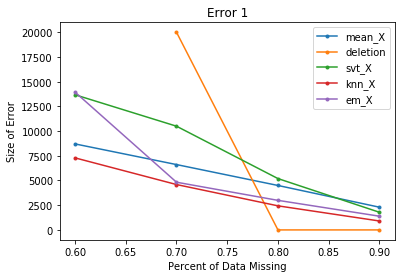

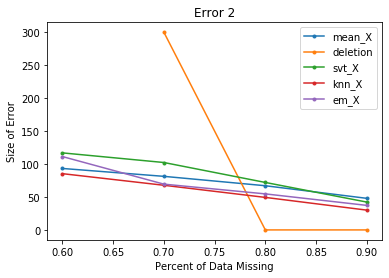

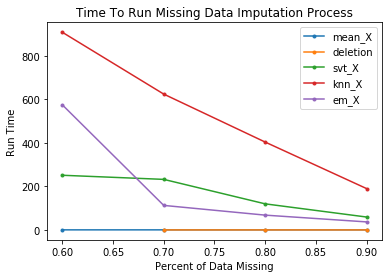

In [35]:
# Full Graphs
ax1 = df_er1.plot(kind='line', x='perc_missing', y=methods, marker=".") 
ax1.set_title("Error 1")
ax1.set_xlabel("Percent of Data Missing")
ax1.set_ylabel("Size of Error")

ax2 = df_er2.plot(kind='line', x='perc_missing', y=methods, marker=".")    
ax2.set_title("Error 2")
ax2.set_xlabel("Percent of Data Missing")
ax2.set_ylabel("Size of Error")

ax3 = df_time.plot(kind='line', x='perc_missing', y=methods, marker=".")    
ax3.set_title("Time To Run Missing Data Imputation Process")
ax3.set_xlabel("Percent of Data Missing")
ax3.set_ylabel("Run Time")